In [1]:
# GHOST - Advection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 2

# geometry mapping degree (isoparametric)
p_geo = 1

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2), p_geo=p_geo)

# volume and facet collocation degrees
p_omega = p
p_gamma = p

theta = np.pi/4
a = np.sqrt(2)

# solver parameters
params1 = {"project_title": "adv_test_2d_1",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 1.0,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": p,
         "facet_collocation_degree": p,
         "solution_representation": "nodal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver1 = Solver(params1,mesh)
params2 = {"project_title": "adv_test_2d_2",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 1.0,
         "integration_type": "collocation",
         "solution_degree": p,
         "volume_collocation_degree": 2*p,
         "facet_collocation_degree": 2*p,
         "solution_representation": "nodal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver2 = Solver(params2,mesh)

In [2]:
uhat_0 = solver1.project_function(solver1.u_0)
solver1.R(uhat_0,0.0)[0]

array([[-7.24592771, -7.50417257, -7.76241743, -0.53299927, -0.79124412,
         6.17992918]])

In [3]:
solver2.R(uhat_0,0.0)[0]

array([[-7.24592771, -7.50417257, -7.76241743, -0.53299927, -0.79124412,
         6.17992918]])

dt =  0.0024937655860349127


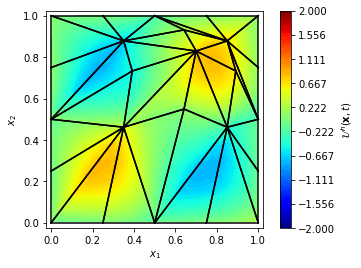

In [4]:
solver1.run()
solver1.post_process()
solver1.plot(plot_numerical=True, plot_exact=False,
            plot_curves=True, plot_nodes=False, 
            u_range=[-2,2])

dt =  0.0024937655860349127


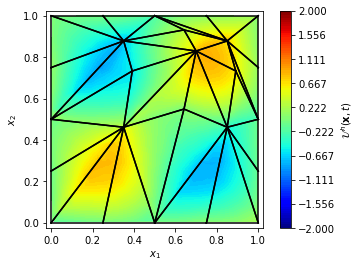

In [5]:
solver2.run()
solver2.post_process()
solver2.plot(plot_numerical=True, plot_exact=False,
            plot_curves=True, plot_nodes=False, 
            u_range=[-2,2])

In [12]:
solver1.u_v[0]

[array([0.02006691, 0.9479052 , 0.88501777, 0.00400063, 0.05548487,
        0.2892389 , 0.0284116 , 0.37813398, 0.63411979, 0.09878447,
        0.59474137, 0.12923492, 0.78288691, 0.06106236, 0.80341943,
        0.9566365 , 0.09602911, 0.90760859, 0.56966178, 0.32678731,
        0.50230723, 0.96094831, 0.33775242, 0.94562417, 0.8704732 ])]

In [13]:
solver2.u_v[0]

[array([0.02006691, 0.9479052 , 0.88501777, 0.00400063, 0.05548487,
        0.2892389 , 0.0284116 , 0.37813398, 0.63411979, 0.09878447,
        0.59474137, 0.12923492, 0.78288691, 0.06106236, 0.80341943,
        0.9566365 , 0.09602911, 0.90760859, 0.56966178, 0.32678731,
        0.50230723, 0.96094831, 0.33775242, 0.94562417, 0.8704732 ])]